<a href="https://colab.research.google.com/github/LUISVILL02/Implementaci-n_IA/blob/main/implementaci%C3%B3n_analisis_comentarios_sexistas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Detección de Sexismo en Textos Ingleses

#### **Descripción del problema**

Hoy en dia, se ha vuelto cada vez más importante identificar y reducir el contenido sexista en redes sociales, dado que estas plataformas juegan un papel fundamental en la construcción de opiniones, creencias y comportamientos de sus usuarios. La persistencia de estereotipos y comentarios sexistas en redes sociales afecta de forma negativa tanto a mujeres como a hombres, y contribuye a la normalización de la desigualdad de género en la sociedad.
<br>

Conscientes de este impacto, muchas compañías detrás de las redes sociales están comenzando a tomar medidas preventivas, implementando políticas y herramientas que detecten y limiten contenido discriminatorio. En este contexto, el presente documento está alineado con la problemática de clasificar sexismo en los comentarios de redes sociales. Este proyecto busca detectar patrones de lenguaje sexista mediante el análisis de contenido textual, utilizando aprendizaje automático para reconocer actitudes y comportamientos sexistas.
<br>

La información obtenida mediante este análisis puede emplearse para diseñar proyectos preventivos.

<br>

Para lleva a cabo este trabajo, se hizo uso del siguiente dataset:

https://www.kaggle.com/datasets/aadyasingh55/sexism-detection-in-english-texts/data

<br>

En este trabajo se busca analizar los comentarios de redes sociales que son sexistas, los cuales se pueden clasificar en 4 categorias:



1.   Amenazas, planes para hacer daño e incitación.
2.   Derogación.
3.   Animosidad.
4.   Discusiones prejuiciosas.

Todos los comentarios son de personas de habla inglesa. En el dataset empleado hay 6 columnas para este conjunto de datos: rewire_id, texto, label_sexist,label_category, label_vector, split.

<br>

#### **Objetivos específicos:**

Implementar los modelos de aprendizaje de máquina: Regresión logistica, árboles de decisión,random forest, Perceptron. Realizar análisis y pruebas con el dataset suministrado de Kaggle. Aplicar ténicas de procesamiento al conjunto de datos.

<br>

#### **Variables del conjunto de datos**



1.   Identificador del comentario (columna "rewire_id"):

  *   Identificador único para cada entrada.

2.   texto (columna "text"):

  *   Contenido del texto en inglés para el análisis.

3. Sexista (columna "label_sexist"):

  *   Clasificación que indica si el texto es sexista.

4. Categoria (columna "label_category"):

  *  Indica la categoria del comentario sexista.

5.  Vectoizacion (columna "label_vector"):

  *  Representa una vectorización del texto.

6.  División (columna "split"):

  *  Indica la división del conjunto de datos. si es de entrenamiento o de prueba.

<br>



### **Librerias requeridas**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

!pip install unidecode
!pip install tensorflow

#Tratar los datos
import re
import nltk
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
from unidecode import unidecode
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

# Importación de librerías Arboles de decision
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_graphviz
import matplotlib.pyplot as plt
import graphviz

from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.neural_network import MLPClassifier

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score, ConfusionMatrixDisplay
from sklearn import tree
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from tensorflow import keras
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, LSTM, Bidirectional, GlobalMaxPooling1D, Dropout

#balanceo de datos
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

from sklearn.feature_selection import SelectFromModel

#Obtener el dataset desde kaggle
import kagglehub
import os

#descargar las palabras reservadas
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger_eng')
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

## **Cargar el dataset**

In [ ]:
path = kagglehub.dataset_download("aadyasingh55/sexism-detection-in-english-texts")

print("Archivos del descagable: ", os.listdir(path))

Archivos del descagable:  ['test (1).csv', 'dev.csv', 'train (2).csv']


## **Inspección del dataset**

In [ ]:
train_data = os.path.join(path,  'train (2).csv') #elegir un archivo especifico
test_data = os.path.join(path,  'test (1).csv')
dev_data = os.path.join(path,  'dev.csv')

train_data_read = pd.read_csv(train_data)
test_data_read = pd.read_csv(test_data)
dev_data_read = pd.read_csv(dev_data)

comentarios = pd.concat([dev_data_read, test_data_read, train_data_read], ignore_index=True)
#comentarios = pd.read_csv(ruta local del archivo)

comentarios.head(10)

,rewire_id,text,label_sexist,label_category,label_vector,split
0,sexism2022_english-9609,"In Nigeria, if you rape a woman, the men rape ...",not sexist,none,none,dev
1,sexism2022_english-966,I bet she wished she had a gun,not sexist,none,none,dev
2,sexism2022_english-3553,I agree with that but at the same time I know ...,sexist,2. derogation,2.1 descriptive attacks,dev
3,sexism2022_english-13328,democrats from Minnesota (leftist muzzie shith...,sexist,2. derogation,2.2 aggressive and emotive attacks,dev
4,sexism2022_english-81,Texas jury sentences Jordanian immigrant to de...,not sexist,none,none,dev
5,sexism2022_english-12741,Workers should leave out their BLT sandwiches ...,not sexist,none,none,dev
6,sexism2022_english-16161,This type of lawsuit could end up with Warren ...,not sexist,none,none,dev
7,sexism2022_english-15676,aim for the head so she dosn't come back,sexist,"1. threats, plans to harm and incitement",1.2 incitement and encouragement of harm,dev
8,sexism2022_english-4858,“THE brother of Kevin Spacey claims the shamed...,not sexist,none,none,dev
9,sexism2022_english-704,This guys gonna have a great time in the barra...,sexist,3. animosity,3.2 immutable gender differences and gender st...,dev


Primeras 10 filas del dataset

In [ ]:
comentarios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   rewire_id       20000 non-null  object
 1   text            20000 non-null  object
 2   label_sexist    20000 non-null  object
 3   label_category  20000 non-null  object
 4   label_vector    20000 non-null  object
 5   split           20000 non-null  object
dtypes: object(6)
memory usage: 937.6+ KB


El conjunto de datos de desarrollo tiene 20000 ejemplos, 1 variables predictora, y la variable a predecir que es label_category.
Por lo tanto, solo nos interesaan 2 columnas de este conjunto de datos, columna text y label_category.

In [ ]:
only_sexist = comentarios[comentarios['label_sexist'] == 'sexist'] # Hemos filtrado solo los comnetarios que son sexistas

only_sexist = only_sexist[['text', 'label_category']] # Solo nos interesan las categorias del comentario y el el comentario en si

only_sexist.head(10)

,text,label_category
2,I agree with that but at the same time I know ...,2. derogation
3,democrats from Minnesota (leftist muzzie shith...,2. derogation
7,aim for the head so she dosn't come back,"1. threats, plans to harm and incitement"
9,This guys gonna have a great time in the barra...,3. animosity
13,Or women can stop being lying whores.,2. derogation
15,until she's been around me long enough through...,4. prejudiced discussions
19,What a nasty bitch. I would’ve failed her on t...,4. prejudiced discussions
27,"Habits are hard to die, as much as the cock ca...",2. derogation
36,I am with you on the False Accuser Registry. s...,"1. threats, plans to harm and incitement"
39,"She’s unstable, you’ll never know when she mig...",2. derogation


Como resultado tenemos solo los comentarios sexistas y sus categorias

In [ ]:
only_sexist.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4854 entries, 2 to 19993
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   text            4854 non-null   object
 1   label_category  4854 non-null   object
dtypes: object(2)
memory usage: 113.8+ KB


Verificamos si hay datos faltantes.





In [ ]:
only_sexist.isna().sum()

,0
text,0
label_category,0


No hay ningun dato faltante.

In [ ]:
print("En total han quedado", only_sexist.shape[0], " filas")

En total han quedado 4854  filas


Vamos a inspeccionar cuantos datos hay por cada categoria, esto nos ayudara a saber que tan distribuidos están los datos entre cada una para luego tomar medidas de balanceo usando tecnicas que nos permitan tener la misma cantidad de datos para todas las categoria.

<ipython-input-14-5dc9e53549b2>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label_category', data=only_sexist, palette={'2. derogation': 'red', '1. threats, plans to harm and incitement': 'green', '3. animosity': 'blue',


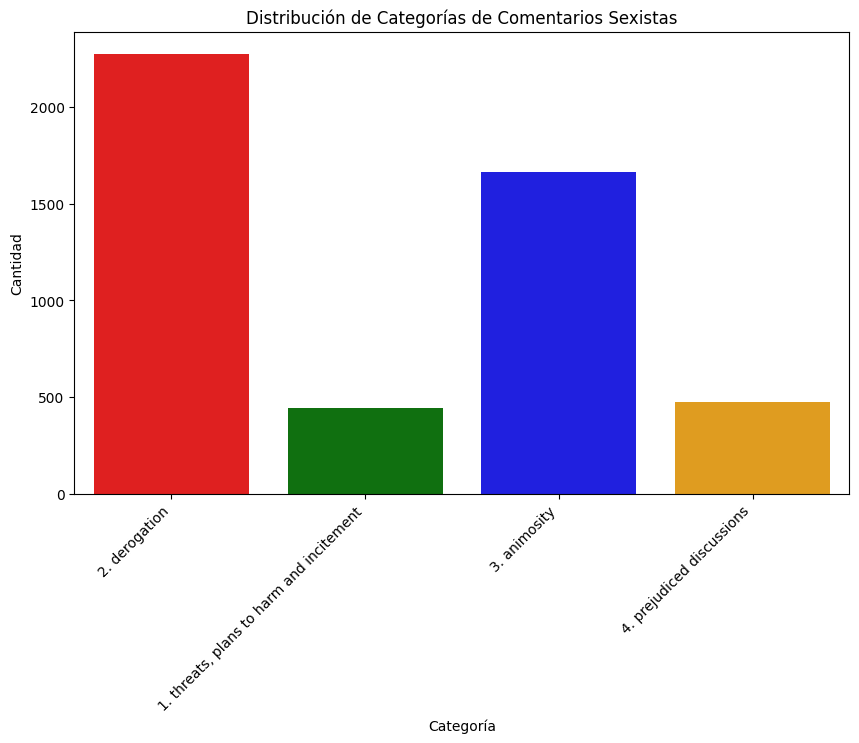

In [ ]:
# Contar la frecuencia de cada categoría
category_counts = only_sexist['label_category'].value_counts()

# Crear la gráfica
plt.figure(figsize=(10, 6))
sns.countplot(x='label_category', data=only_sexist, palette={'2. derogation': 'red', '1. threats, plans to harm and incitement': 'green', '3. animosity': 'blue',
                                                             '4. prejudiced discussions': 'orange'})
plt.title('Distribución de Categorías de Comentarios Sexistas')
plt.xlabel('Categoría')
plt.ylabel('Cantidad')
plt.xticks(rotation=45, ha='right')  # Rotar las etiquetas del eje x para mejor legibilidad
plt.show()

Observamos que los datos estan algo desbalanceados lo cual se tendrán que tomar medidas mas adelante.
Se nota graficamente que la categoria que cuenta con mas datos es la categoria de Derogación, seguido por la categoria de animosidad.
Realmente es un problema tener los datos de esta manera porque probablemente los modelos de machine learning a evaluar tenga dificultades a la hora de clasificar los comentarios sexista.

## **Analisis exporatorio**

Lo que se hará en el siguiente analisis es tranformar los comentarios realizando las siguientes tareas:



Eliminar la preposiciones y pronombres de una lista de tokens que estaán en ingles.

In [ ]:
def eliminar_prep_pron(tokens):
    # Obtener lista de stopwords(palabras comunes irrelevantes) en inglés
    stop_words = set(stopwords.words('english'))

    # Identificar y etiquetar las palabras con Part-Of-Speech (POS)
    tagged_tokens = pos_tag(tokens)

    # Filtrar los tokens que no son preposiciones (IN) ni pronombres (PRP o PRP$)
    tokens_filtrados = [
        token for token, tag in tagged_tokens
        if tag not in ('IN', 'PRP', 'PRP$') and token not in stop_words
    ]

    return tokens_filtrados

Función que limpia y tokeniza un comentario:


In [ ]:
def limpiar_tokenizar(texto, eliminar_prep_pron):
    lemmatizer = WordNetLemmatizer() # Crear instancia del lematizador
    nuevo_texto = texto.lower() # conbertir a minusculas

    # Eliminación de signos de puntuación
    regex = '[\\!\\"\\#\\$\\%\\&\\\'\\(\\)\\*\\+\\,\\-\\.\\/\\:\\;\\<\\=\\>\\?\\@\\[\\\\\\]\\^_\\`\\{\\|\\}\\~]'
    nuevo_texto = re.sub(regex , ' ', nuevo_texto)
    nuevo_texto = re.sub("\d+", ' ', nuevo_texto)
    nuevo_texto = re.sub("\\s+", ' ', nuevo_texto)
    nuevo_texto = unidecode(nuevo_texto)
    nuevo_texto = re.sub("\d+/\d+", ' ', nuevo_texto)
    nuevo_texto = re.sub("\d{1,2}/\d{1,2}/\d{2,4}", ' ', nuevo_texto)
    nuevo_texto = nuevo_texto.split(sep=' ')
    nuevo_texto = eliminar_prep_pron(nuevo_texto)# Eliminar preposiciones, pronombres y stopWords
    nuevo_texto = [lemmatizer.lemmatize(token) for token in nuevo_texto]

    nuevo_texto = [token for token in nuevo_texto if len(token) > 1]  # Eliminación de tokens con una longitud < 2

    return nuevo_texto

Esta función toma los valores de la columna 'text' del DataFrame 'only_sexist', los limpia y tokeniza utilizando la función 'limpiar_tokenizar', y luego asigna los resultados a la columna 'texto_tokenizado'

In [ ]:
only_sexist['comentarios_tokenizados'] = only_sexist['text'].apply(lambda x: limpiar_tokenizar(x, eliminar_prep_pron))

only_sexist.head()

,text,label_category,comentarios_tokenizados
2,I agree with that but at the same time I know ...,2. derogation,"[agree, time, know, well, enough, say, can't, ..."
3,democrats from Minnesota (leftist muzzie shith...,2. derogation,"[democrat, minnesota, leftist, muzzie, shithol..."
7,aim for the head so she dosn't come back,"1. threats, plans to harm and incitement","[aim, head, dosn, come, back]"
9,This guys gonna have a great time in the barra...,3. animosity,"[guy, gonna, great, time, barrack, know, first..."
13,Or women can stop being lying whores.,2. derogation,"[woman, stop, lying, whore]"


Se ha decidido crear un grafico de nubes de palabras para identificar cuales son las que mas se repiten por categoria.
esto mas adelante nos permitirá saber que palabras no serian relevantes para poder determianr si un comentario es de una categoria u otra.

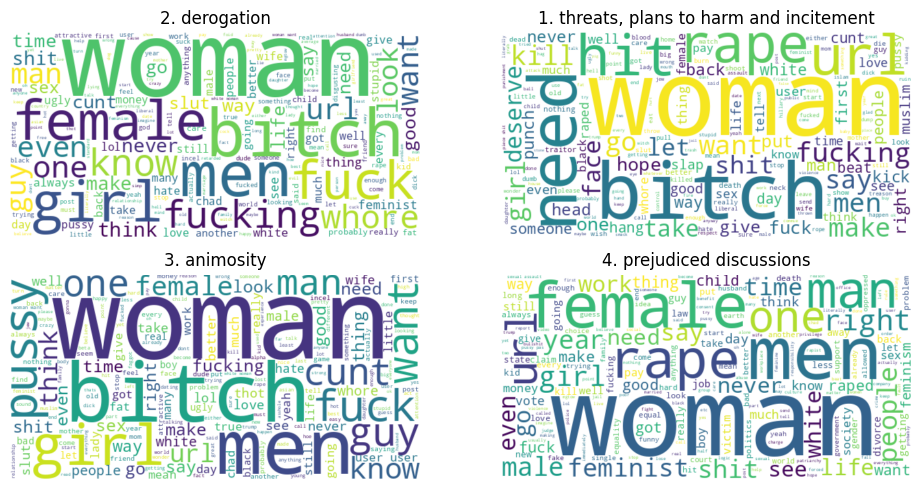

In [ ]:
categorias = only_sexist['label_category'].unique()

plt.figure(figsize=(10, 5))

for i, categoria in enumerate(categorias):
    comentarios = ' '.join(only_sexist[only_sexist['label_category'] == categoria]['comentarios_tokenizados'].apply(lambda x: ' '.join(x)))

    wordcloud = WordCloud(width=600, height=300, background_color='white').generate(comentarios)

    plt.subplot(2, 2, i + 1)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'{categoria}')

plt.tight_layout()
plt.show()

Vamos observando a simple vista que la palabra que mas se repite es 'WOMAN'.
seguido de muchas otras palabras

<br>

Ahora veamos mas precisamente la cantidad de palabras que hay por cada categoria, esto nos permitirá determinar que categorias son mas variadas.

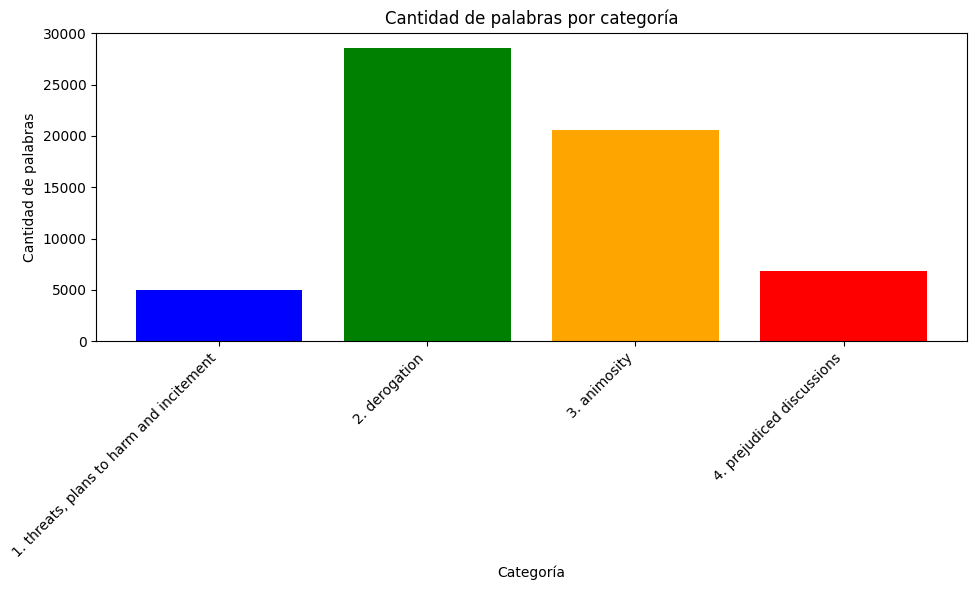

Cantidad de palabras por categoría:
label_category
1. threats, plans to harm and incitement     4986
2. derogation                               28615
3. animosity                                20610
4. prejudiced discussions                    6875
Name: comentarios_tokenizados, dtype: int64


In [ ]:

num_palabras_categ = only_sexist.groupby('label_category')['comentarios_tokenizados'].apply(lambda x: x.apply(len).sum())

plt.figure(figsize=(10, 6))
plt.bar(num_palabras_categ.index, num_palabras_categ, color=['blue', 'green', 'orange', 'red'])

plt.title('Cantidad de palabras por categoría')
plt.xlabel('Categoría')
plt.ylabel('Cantidad de palabras')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()

print("Cantidad de palabras por categoría:")
print(num_palabras_categ)

Nuevamente y como era de esperarse, la categoria que posee mas palabras es la de derogación porque es la que tiene mas datos. Y tambien, por otro lado la que posee menos palabras es la de Amenzas, planes para hacer daño e incitación.

Tambien queremos saber cuantas palabras distintas hay por cada categoria porque asi sabremos que palabras podrian hacer que un comentario pertenezca a una categoria u otra.

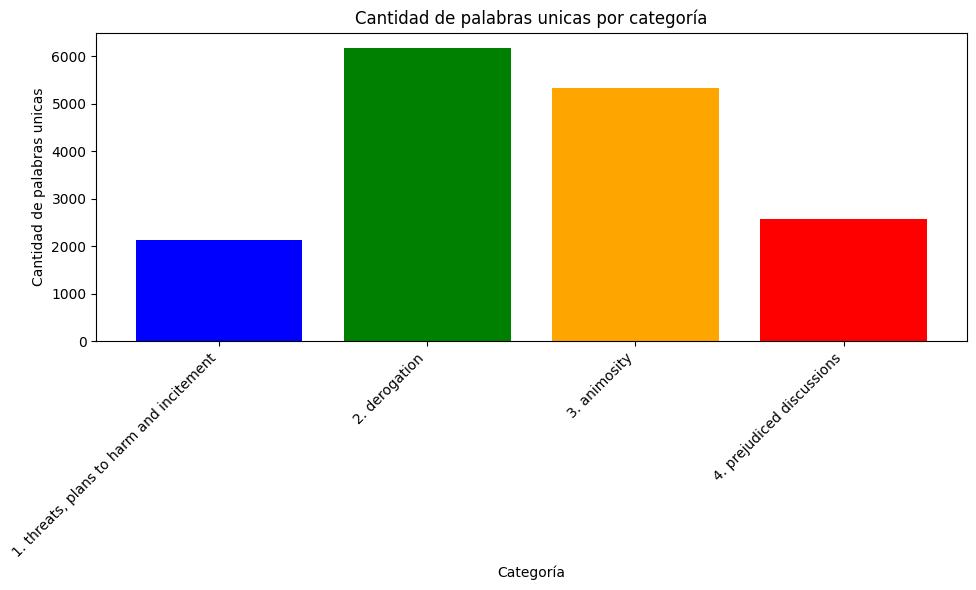

label_category
1. threats, plans to harm and incitement    2133
2. derogation                               6185
3. animosity                                5334
4. prejudiced discussions                   2582
Name: comentarios_tokenizados, dtype: int64


In [ ]:
palabras_unicas_por_categoria = only_sexist.groupby('label_category')['comentarios_tokenizados']\
    .apply(lambda x: set([word for sublist in x for word in sublist]))

antidad_palabras_unicas = palabras_unicas_por_categoria.apply(len)

plt.figure(figsize=(10, 6))
plt.bar(antidad_palabras_unicas.index, antidad_palabras_unicas, color=['blue', 'green', 'orange', 'red'])

plt.title('Cantidad de palabras unicas por categoría')
plt.xlabel('Categoría')
plt.ylabel('Cantidad de palabras unicas')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()

print(palabras_unicas_por_categoria.apply(len))

Lo esperado, como hemos visto durante todo el analisis es que de categoria de derogación contenta la mayor cantidad de palabras unicas.

Ahora lo que queremos analizar es cuantas palabras unicas son comunes entre categorias.
Tambien nos podria ayudar a reflejar que palabras podrian genrarle poblemas a la hora de clasificiar los comentarios a los modelos.

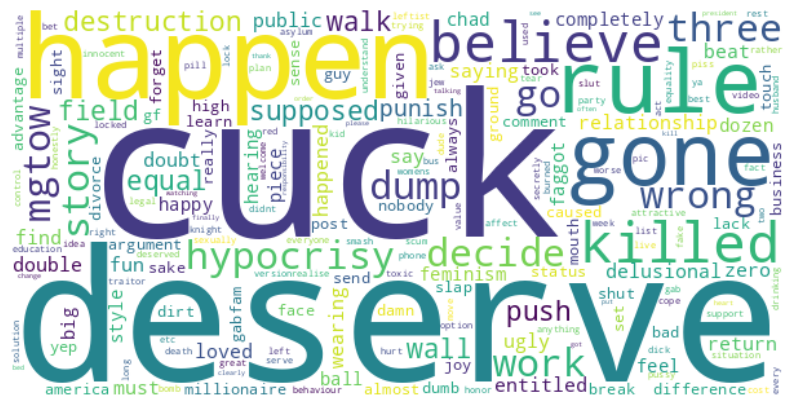

In [ ]:
palabras_comunes = set.intersection(*palabras_unicas_por_categoria)

cadena = " ".join(palabras_comunes)

nube = WordCloud(width=600, height=300, background_color='white').generate(cadena)

plt.figure(figsize=(10, 6))
plt.imshow(nube, interpolation="bilinear")
plt.axis("off")
plt.show()

Observamos que hay varias palabras comunes entre las categorias.

## **Vectorización**

para vectorizar los datos decidimos aplicar Counvectorizer porque nos ayudará a crear una matriz dispersa llamada "matriz de características", en la que cada valor es la cuenta de una palabra en un documento. Así, se convierte el texto en un formato que los modelos de Machine Learning pueden entender.

In [ ]:
vectorizacion = CountVectorizer(min_df=0.005)
texto_vectorizado = vectorizacion.fit_transform(only_sexist['comentarios_tokenizados'].apply(lambda x: ' '.join(x)))

only_sexist['comentarios_tokenizados'] = only_sexist['comentarios_tokenizados'].apply(lambda x: ' '.join(x))

only_sexist.head(10)

,text,label_category,comentarios_tokenizados
2,I agree with that but at the same time I know ...,2. derogation,agree time know well enough say can't love wom...
3,democrats from Minnesota (leftist muzzie shith...,2. derogation,democrat minnesota leftist muzzie shithole dum...
7,aim for the head so she dosn't come back,"1. threats, plans to harm and incitement",aim head dosn come back
9,This guys gonna have a great time in the barra...,3. animosity,guy gonna great time barrack know first time t...
13,Or women can stop being lying whores.,2. derogation,woman stop lying whore
15,until she's been around me long enough through...,4. prejudiced discussions,long enough real life situation actually see r...
19,What a nasty bitch. I would’ve failed her on t...,4. prejudiced discussions,nasty bitch would've failed spot day pull much...
27,"Habits are hard to die, as much as the cock ca...",2. derogation,habit hard die much cock carousel rode life
36,I am with you on the False Accuser Registry. s...,"1. threats, plans to harm and incitement",false accuser registry deserve get raped empat...
39,"She’s unstable, you’ll never know when she mig...",2. derogation,unstable never know might dump cuck ugliest th...


In [ ]:
only_sexist_text = pd.DataFrame(data=texto_vectorizado.toarray(), columns = vectorizacion.get_feature_names_out())
only_sexist_temp = only_sexist
only_sexist_temp.reset_index(drop=True, inplace=True)
only_sexist_text.reset_index(drop=True, inplace=True)

only_sexist_new = pd.concat([only_sexist_temp, only_sexist_text], axis=1)
only_sexist_new.head(10)

,text,label_category,comentarios_tokenizados,act,actually,age,agree,allowed,almost,alone,...,world,worse,worst,would,wrong,yeah,year,yes,yet,young
0,I agree with that but at the same time I know ...,2. derogation,agree time know well enough say can't love wom...,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,democrats from Minnesota (leftist muzzie shith...,2. derogation,democrat minnesota leftist muzzie shithole dum...,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,aim for the head so she dosn't come back,"1. threats, plans to harm and incitement",aim head dosn come back,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,This guys gonna have a great time in the barra...,3. animosity,guy gonna great time barrack know first time t...,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Or women can stop being lying whores.,2. derogation,woman stop lying whore,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,until she's been around me long enough through...,4. prejudiced discussions,long enough real life situation actually see r...,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,What a nasty bitch. I would’ve failed her on t...,4. prejudiced discussions,nasty bitch would've failed spot day pull much...,0,0,0,0,0,0,0,...,0,0,0,2,0,0,0,0,0,0
7,"Habits are hard to die, as much as the cock ca...",2. derogation,habit hard die much cock carousel rode life,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,I am with you on the False Accuser Registry. s...,"1. threats, plans to harm and incitement",false accuser registry deserve get raped empat...,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,"She’s unstable, you’ll never know when she mig...",2. derogation,unstable never know might dump cuck ugliest th...,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
x = only_sexist_new[['label_category', 'comentarios_tokenizados']]  # Catacteristicas
X = vectorizacion.fit_transform(only_sexist_new['comentarios_tokenizados']) # caracteristicas
y = only_sexist_new['label_category']  # La columna a predecir

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(only_sexist_new['label_category'])

# Mostrar las dimensiones de X Y para verificación
print(X.shape)
print(y.shape)

(4854, 395)
(4854,)


Queremos sabe que tan correlacionadas estan las caracteristicas. Aunque en datos como comentarios, las caracteristicas que en este caso son las palabras no suelen estar correlacioandas, porque no siempre se usan de manera dependiente entre si.

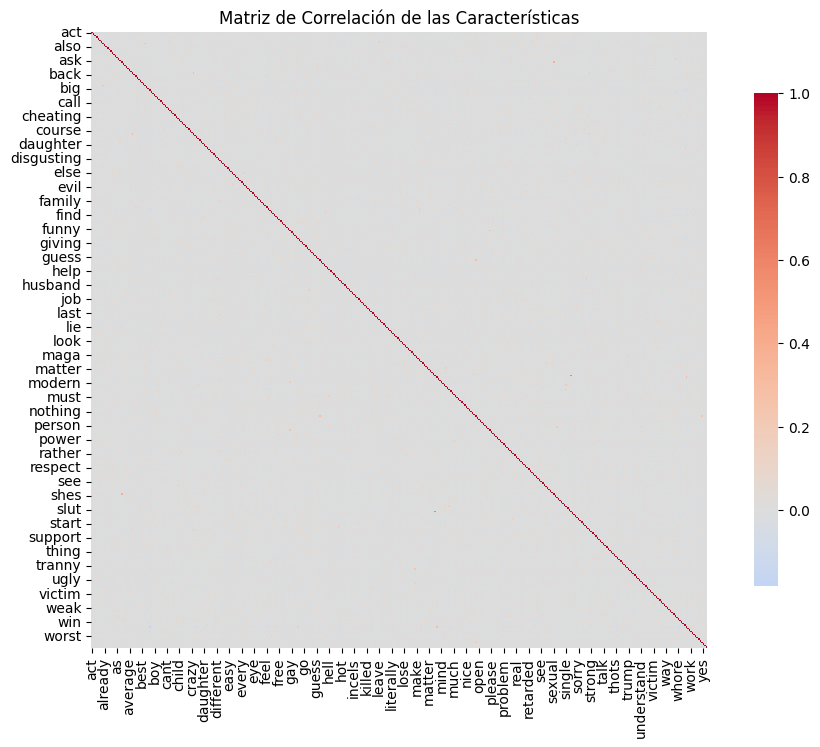

In [ ]:
X_dense = X.toarray()

feature_names = vectorizacion.get_feature_names_out()
X_df = pd.DataFrame(X_dense, columns=feature_names)

# Calcular la matriz de correlación
correlation_matrix = X_df.corr()


plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, cmap="coolwarm", center=0, square=True, cbar_kws={"shrink": .8})
plt.title("Matriz de Correlación de las Características")
plt.show()

<br>

Dividimos los datos en datos de entrenamiento y pruebas

Y como mencionabamos anteriormente, haciendo pruebas por fuera tuvimos problemas a la hora de obtener buenos resultados cuando se entrenaron los modelos. Decidimos entonces balancear los datos aplicando una tecnica de oversampler para rellenar las categorias que tenian pocos datos.

Por otro lado, se aplico la tecnica de selección de mejores caracteristicas usando el modelo de random forest.

Distribución de clases después de oversampling:
[1600 1600 1600 1600]


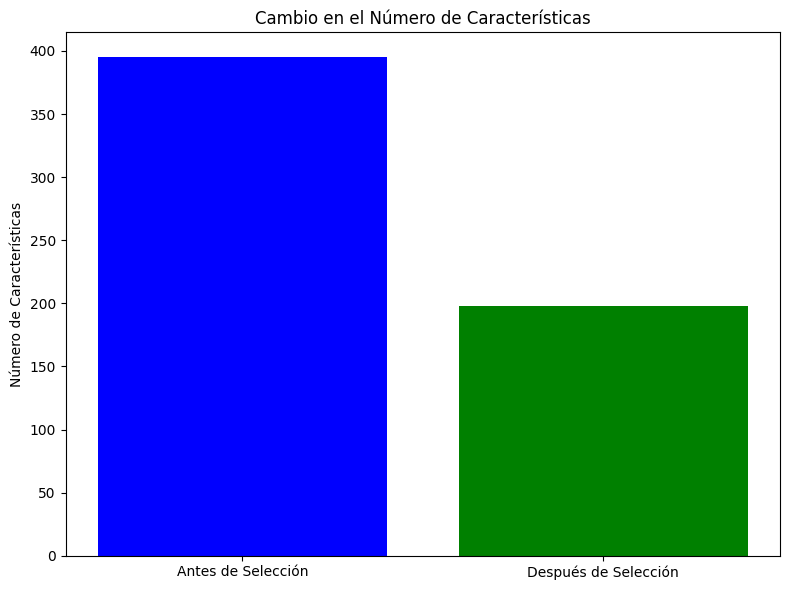

Número de características antes de la selección: 395
Número de características después de la selección: 198


In [ ]:
X_train_d, X_test_d, y_train_d, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

oversampler = RandomOverSampler(random_state=42)
X_train_b, y_train = oversampler.fit_resample(X_train_d, y_train_d)

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_b, y_train)

# Selección de características
selector = SelectFromModel(rf, threshold='median')
X_train = selector.fit_transform(X_train_b, y_train)
X_test = selector.transform(X_test_d)

#under_sampler = RandomUnderSampler(random_state=42)
#X_train, y_train = under_sampler.fit_resample(X_train_d, y_train_d)

# Verificar el balance después del oversampling
print("Distribución de clases después de oversampling:")
print(np.bincount(y_train))

n_features_before = X_train_b.shape[1]  # Número de características antes de la selección
n_features_after = X_train.shape[1]  # Número de características después de la selección

# Graficar la comparación
labels = ['Antes de Selección', 'Después de Selección']
values = [n_features_before, n_features_after]

plt.figure(figsize=(8, 6))
plt.bar(labels, values, color=['blue', 'green'])
plt.title('Cambio en el Número de Características')
plt.ylabel('Número de Características')
plt.tight_layout()
plt.show()

# Imprimir los resultados
print(f'Número de características antes de la selección: {n_features_before}')
print(f'Número de características después de la selección: {n_features_after}')

Hemos reducido el numero de caracteristicas importantes.

# **Modelos de implementación**

Como se mencionaba en el objetivo de este trabajo, lo principal es aplicar 4 modelos de machine learning que nos ayuden a clasificar comentarios sexistas de un set de datos provenientes comentarios de personas de habla inglesa de las redes sociales.
los modelos principales seria:
1. Regresión logistica.

2. Arboles de decisión.

3. Bosques aleatorios.

4. MLP.

5. Redes neuronales profundas.

Buscamos una combinación de parametros adecuada aplicando 3 experimentos de combinación, haciendo uso de rejillas de parametros. Esto para cada modelo y asi quedarnos con el que nos de mejor resultado.

## Regresión logistica

1. **Primer experimento**: combinación de parámetros arrojada:
Mejores parámetros:



```
{'C': [1, 10], 'solver': ['liblinear'], 'tol': [1e-5], 'max_iter': [10000]}
```

con un resultado de 41.72% en datos de prueba y 61.65% en datos de entrenamiento.


2. **Segundo experimento**: combinación de parámetros arrojada:
Mejores parámetros:



```
{'C': [0.1, 1, 10, 100], 'penalty': ['l1', 'l2'], 'solver': ['saga'], 'tol': [0.001, 0.01, 0.1],}
```

con un resultado de 41.24% en datos de prueba y 62.12% en datos de entrenamiento.


3. **Tercer experimento**: combinación de parámetros arrojada:
Mejores parámetros:

```

{'C': [50], 'solver': ['saga'], 'tol': [0.005],}
```

con un resultado de 42.55% en datos de prueba y 59.34% en datos de entrenamiento.

Mejores parámetros: {'C': 1, 'solver': 'saga', 'tol': 0.1}

Datos de entrenamiento
Accuracy: 0.583125
F1 Score: 0.5780765112685805
Matriz de confusión
[[1086  178  200  136]
 [ 232  692  379  297]
 [ 250  346  785  219]
 [ 158  200   73 1169]]

              precision    recall  f1-score   support

           0       0.63      0.68      0.65      1600
           1       0.49      0.43      0.46      1600
           2       0.55      0.49      0.52      1600
           3       0.64      0.73      0.68      1600

    accuracy                           0.58      6400
   macro avg       0.58      0.58      0.58      6400
weighted avg       0.58      0.58      0.58      6400

------------------------------

Accuracy: 0.424159231297186
F1 Score: 0.43489699717980457
Matriz de confusión
[[ 74  13  14  22]
 [115 257 176 123]
 [ 84 136 198  98]
 [ 16  25  17  89]]

              precision    recall  f1-score   support

           0       0.26      0.60      0.36       123
           1       0.60

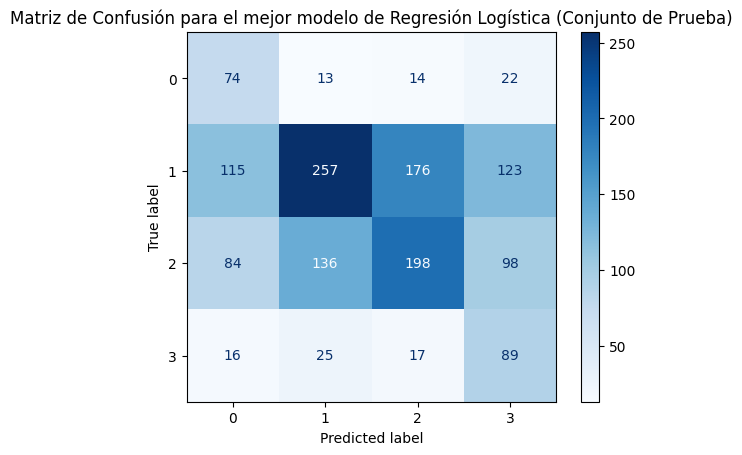

In [ ]:
"""
# Experimento 1
param_grid = {
    'C': [1, 10],
    'solver': ['liblinear'],
    'tol': [1e-5],
    'max_iter': [10000],
}

"""
"""
# Experimento 2
param_grid = {
    'C': [0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['saga'],
    'tol': [0.001, 0.01, 0.1],
}
"""

#Experimento 3
param_grid = {
    'C': [1],
    'solver': ['saga'],
    'tol': [0.1]
}

model = LogisticRegression()
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Obtener el mejor modelo ajustado
best_model = grid_search.best_estimator_

print("Mejores parámetros:", grid_search.best_params_)


#Predecir para los datos de entrenamiento
y_pred = best_model.predict(X_train)
accuracy = accuracy_score(y_train, y_pred)
train_f1_score = f1_score(y_train, y_pred, average='weighted')
report = classification_report(y_train, y_pred)

cmatrix = confusion_matrix(y_train, y_pred)
print()
print("Datos de entrenamiento")
print(f'Accuracy: {accuracy}')
print(f'F1 Score: {train_f1_score}')
print("Matriz de confusión")
print(cmatrix)
print()
print(report)

print("-"*30)
#Predecir para los datos de prueba
y_pred_test = best_model.predict(X_test)
accuracy_test = accuracy_score(y_test, y_pred_test)
test_f1_score = f1_score(y_test, y_pred_test, average='weighted')
report_test = classification_report(y_test, y_pred_test)


cmatrix_test = confusion_matrix(y_test, y_pred_test)
print()
print(f'Accuracy: {accuracy_test}')
print(f'F1 Score: {test_f1_score}')
print("Matriz de confusión")
print(cmatrix_test)
print()
print(report_test)

# Mostrar la matriz de confusión para los datos de prueba
print("Matriz de confusión para los datos de prueba del modelo Regresión Logística")
disp_logreg = ConfusionMatrixDisplay(confusion_matrix=cmatrix_test, display_labels=best_model.classes_)
disp_logreg.plot(cmap=plt.cm.Blues)
plt.title('Matriz de Confusión para el mejor modelo de Regresión Logística (Conjunto de Prueba)')
plt.show()

## Conclusion de experimentos con regresión lógistica

A través de los tres experimentos realizados, se evaluaron diferentes combinaciones de hiperparámetros para un modelo de regresión logística. Los mejores parámetros encontrados en cada experimento son los siguientes:

Experimento 1:


```
{'C': [1, 10], 'solver': ['liblinear'], 'tol': [1e-5], 'max_iter': [10000]}
```

Experimento 2:

```
{'C': [0.1, 1, 10, 100], 'penalty': ['l1', 'l2'], 'solver': ['saga'], 'tol': [0.001, 0.01, 0.1],}
```

Experimento 3:


```
{'C': [50], 'solver': ['saga'], 'tol': [0.005],}
```

Aunque los tres modelos mostraron un buen desempeño en los datos de entrenamiento, con un accuracy superior al 60%, en los datos de prueba se observó una baja capacidad de generalización, con un rendimiento inferior al 45% en todos los casos. Esto sugiere que el modelo tiene dificultades para capturar patrones de los datos en general.

El Experimento 3 mostró el mejor rendimiento en términos de accuracy (42.41%) y F1 Score (43.52%) en los datos de prueba. Además, la matriz de confusión indicó que el modelo tiene dificultades para clasificar algunas clases de comentarios sexistas, particularmente las clases 0, 1 y 2. Sin embargo, la clase 3 presentó un rendimiento algo superior.

*Selección del mejor modelo*
El Experimento 3 fue el que produjo los mejores resultados en términos de precisión y F1 Score en los datos de prueba, por lo que sería el modelo recomendado para continuar afinando.

## Arboles de decisión

1.   **Primer experimento**, Probando el hyperparametro de min_samples_split, la combinacion de parametros arrojada fue: Mejores parámetros: `Mejores parámetros: {'min_samples_split': 10}`
 con un resultado de 42% con datos de prueba y 90% con datos de entrenamiento.

2.   **Segundo experimento**, Probando el hyperparametro de min_samples_leaf, la combinacion de parametros arrojada: `Mejores parámetros: {'min_samples_leaf': 3}` con un resultado de 44% en datos de prueba y 74% en datos de entrenamiento.

3. **Tercer experimento**, Probando el hiperparametro de max_depth, la combinacion de parametros arrojada: `Mejores parámetros: {'max_depth': 48}` con un resultado de 41% en datos de prueba y 88% en datos de entrenamiento.

<br>

Nos quedamos con el segundo experimento porque en lineas generales, fue el que mejor rendimiento nos ofreció, a pesar de que el resultado arrojado por las metricas no haya sido de nuestra satisfacción.

In [ ]:
# Vectorización de los comentarios tokenizados
#X_train_vect = vectorizacion.fit_transform(X_train)
X_train_vect = X_train
#X_test_vect = vectorizacion.transform(X_test)
X_test_vect = X_test

Ahora seguimos en la busqueda de parametros adecuados que nos permitan adaptar y entrenar el modelo de la mejor forma,

Mejores parámetros: {'min_samples_leaf': 3}

Datos de entrenamiento
Accuracy: 84.39%
F1 Score 84.15%

Matriz de confusión
[[1536   34   24    6]
 [  99 1218  211   72]
 [  84  362 1111   43]
 [   0   51   13 1536]]
------------------------------
Datos de prueba
Accuracy: 44.54%
F1 Score 44.29%

              precision    recall  f1-score   support

           0       0.27      0.37      0.31       123
           1       0.52      0.57      0.54       671
           2       0.47      0.38      0.42       516
           3       0.20      0.18      0.19       147

    accuracy                           0.45      1457
   macro avg       0.36      0.37      0.36      1457
weighted avg       0.45      0.45      0.44      1457

Matriz de confusión para los datos de prueba del modelo Arboles de decisión


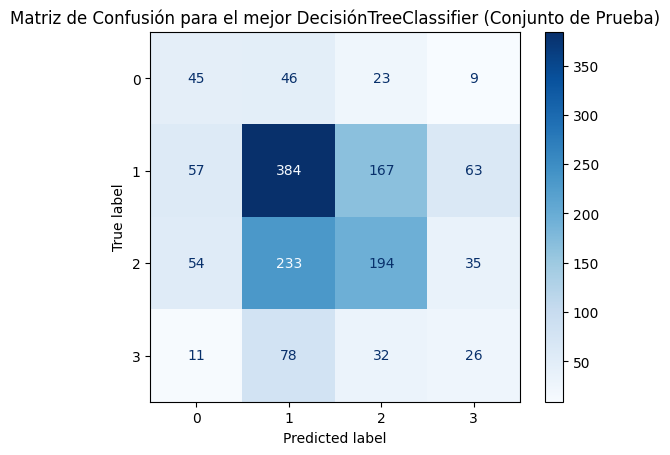

In [ ]:

#Experimento 2
param_grid_tree_desc = {
    'min_samples_leaf': [3, 5, 4],  # Mínimo de muestras en una hoja
}

"""
#Experimento 1
param_grid_tree_desc = {
    'min_samples_split': [15, 10, 13],  # Mínimo de muestras para dividir
}
"""

"""
#Experimento 3
param_grid_tree_desc = {
    'max_depth': [37, 48, 34],  # Profundidad máxima
}
"""


dtree = DecisionTreeClassifier()

grid_search_tree_dec = GridSearchCV(estimator=dtree, param_grid=param_grid_tree_desc, cv=5, scoring='accuracy', n_jobs=-1)

grid_search_tree_dec.fit(X_train, y_train)

# Obtener el mejor estimador
best_tree = grid_search_tree_dec.best_estimator_

print("Mejores parámetros:", grid_search_tree_dec.best_params_)
print()

#Predecir para el conjunto de entrenamiento
print("Datos de entrenamiento")
y_train_pred_tree_desc = best_tree.predict(X_train_vect)
accuracy_train_tree_desc = accuracy_score(y_train, y_train_pred_tree_desc)
train_f1_score_tree_desc = f1_score(y_train, y_train_pred_tree_desc, average='weighted')

cmatrix_tree_desc = confusion_matrix(y_train, y_train_pred_tree_desc)
print(f'Accuracy: {accuracy_train_tree_desc* 100:.2f}%')
print(f'F1 Score {train_f1_score_tree_desc* 100:.2f}%')
print()
print("Matriz de confusión")
print(cmatrix_tree_desc)
print("-"*30)


#Predecir para el conjunto de pruebas
print("Datos de prueba")
y_test_pred_tree_desc = best_tree.predict(X_test_vect)
accuracy_test_tree_desc = accuracy_score(y_test, y_test_pred_tree_desc)
test_f1_score_tree_desc = f1_score(y_test, y_test_pred_tree_desc, average='weighted')

report_test = classification_report(y_test, y_test_pred_tree_desc)
cmatrix_tree_desc = confusion_matrix(y_test, y_test_pred_tree_desc)
print(f'Accuracy: {accuracy_test_tree_desc* 100:.2f}%')
print(f'F1 Score {test_f1_score_tree_desc* 100:.2f}%')
print()
print(report_test)

print("Matriz de confusión para los datos de prueba del modelo Arboles de decisión")
disp_dtree = ConfusionMatrixDisplay(confusion_matrix=cmatrix_tree_desc, display_labels=best_tree.classes_)
disp_dtree.plot(cmap=plt.cm.Blues)
plt.title('Matriz de Confusión para el mejor DecisiónTreeClassifier (Conjunto de Prueba)')
plt.show()


## Conclusión de Experimentos con Árboles de Decisión

A través de los experimentos, en el modelo de árboles de decisión para la clasificación de comentarios sexistas, se obtuvieron resultados variados en términos de precisión y ajuste entre los datos de entrenamiento y prueba. En general, los parámetros que mejor rendimiento ofrecieron fueron `{'min_samples_leaf': 3}`.

En el segundo experimento, el modelo alcanzó una **precisión del 84% en los datos de entrenamiento**, con un **F1 Score del 84%**, lo cual muestra que el modelo logró ajustar razonablemente los datos de entrenamiento. Sin embargo, en los **datos de prueba**, el rendimiento fue significativamente menor, con una precisión del 44% y un F1 Score de 43%, es decir, tuvo problemas de generalización.

Analizando la matriz de confusión y las métricas de precisión y recall por cada una de las clase en los datos de prueba, encontramos que las clases presentan dificultades para ser correctamente clasificadas de manera consistente. Por ejemplo, aunque la clase 1 presenta la mejor precisión y recall, las clases restantes presentan valores considerablemente más bajos, lo cual sugiere que el modelo tiene problemas para capturar patrones discriminatorios en ciertas categorías de comentarios.


## Ramdon Forest

1.   **Primer experimento**: Los mejores hiperparámetros arrojados para DecisionTreeClassifier fueron: DecisionTreeClassifier: {'bootstrap': True, 'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 150, 'min_samples_leaf': 4, 'n_estimators': 200} con un resultado de 45% con datos de prueba y 77% con datos de entrenamiento.
2.   **Segundo experimento**: Los mejores hiperparámetros arrojados para DecisionTreeClassifier fueron: {'bootstrap': True, 'criterion': 'entropy', 'max_depth': 25, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'n_estimators': 100} con un resultado de 43% con datos de prueba y 81% con datos de entrenamiento.
2.   **Tercer experimento**: Los mejores hiperparámetros arrojados para DecisionTreeClassifier fueron:  {'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 40, 'min_samples_leaf': 1, 'min_samples_split': 9, 'n_estimators': 200} con un resultado de 44% con datos de prueba y 88% con datos de entrenamiento.

Fitting 5 folds for each of 18 candidates, totalling 90 fits
Mejores hiperparámetros para DecisionTreeClassifier: {'bootstrap': True, 'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 150, 'min_samples_leaf': 4, 'n_estimators': 200}

Datos de entrenamiento

Accuracy: 0.7778125
F1 Score: 0.7710579331736878

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.90      0.86      1600
           1       0.73      0.59      0.65      1600
           2       0.73      0.68      0.70      1600
           3       0.80      0.94      0.87      1600

    accuracy                           0.78      6400
   macro avg       0.77      0.78      0.77      6400
weighted avg       0.77      0.78      0.77      6400


Matriz de confusión para los datos de entrenamiento:
 [[1442   59   60   39]
 [ 155  941  308  196]
 [ 133  239 1084  144]
 [  18   45   26 1511]]
------------------------------

Datos de prueba

Accuracy: 0.439258750857

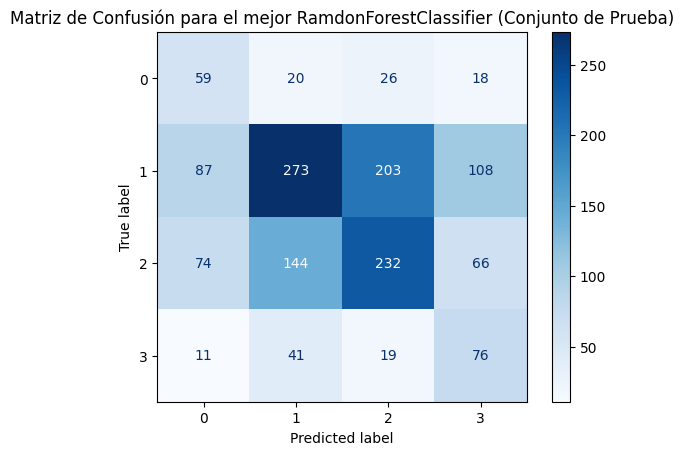

In [ ]:

#Primer Experimento
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [50, 100, 150],
    'min_samples_leaf': [4, 6, 8],
    'bootstrap': [True],
    'class_weight': ['balanced'],
    'criterion': ['gini']
}

"""
#Segundo Experimento
param_grid_rf = {
    'n_estimators': [ 100, 150],
    'max_depth': [10, 20, 25],
    'min_samples_split': [1, 5, 10],
    'max_features': ['sqrt'],
    'bootstrap': [True],
    'criterion': ['gini', 'entropy'],
}
"""
"""
#Tercer Experimento
param_grid_rf = {
    'n_estimators': [250, 200, 90],
    'max_depth': [10, 30, 40],
    'min_samples_split': [9, 11, 25],
    'min_samples_leaf' : [1, 7, 8],
    'class_weight': ['balanced'],
    'criterion': ['entropy', 'gini'],
}

"""

tree = RandomForestClassifier()

# Aplicar Grid Search con validación cruzada
grid_search_tree = GridSearchCV(tree, param_grid=param_grid_rf, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)
grid_search_tree.fit(X_train, y_train)

# Obtener el mejor estimador
best_rf = grid_search_tree.best_estimator_

# Hacer predicciones en el conjunto de prueba
y_train_pred_rf = best_rf.predict(X_train)
y_test_pred_rf = best_rf.predict(X_test)

# Mostrar los mejores parámetros
print("Mejores hiperparámetros para DecisionTreeClassifier:", grid_search_tree.best_params_)
print()

# Calcular precisión para el conjunto de entrenamiento
print("Datos de entrenamiento")
print()
train_accuracy_rf = accuracy_score(y_train, y_train_pred_rf)
train_f1_tree = f1_score(y_train, y_train_pred_rf, average='weighted')
print(f'Accuracy: {train_accuracy_rf }')
print(f'F1 Score: {train_f1_tree}')
print("\nClassification Report:\n", classification_report(y_train, y_train_pred_rf))
cm_train_rf = confusion_matrix(y_train, y_train_pred_rf)
print()
print("Matriz de confusión para los datos de entrenamiento:\n", cm_train_rf)

print("-"*30)
print()

# Calcular precisión y otras métricas para el conjunto de prueba
print("Datos de prueba")
print()
test_accuracy_rf = accuracy_score(y_test, y_test_pred_rf)
test_f1_tree = f1_score(y_test, y_test_pred_rf, average='weighted')
print(f'Accuracy: {test_accuracy_rf}')
print(f'F1 Score: {test_f1_tree}')
cm_test_rf = confusion_matrix(y_test, y_test_pred_rf)
print()


print("Matriz de confusión para los datos de prueba del modelo Bosques aleatorios")
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_test_rf, display_labels=best_rf.classes_)
disp_rf.plot(cmap=plt.cm.Blues)
plt.title('Matriz de Confusión para el mejor RamdonForestClassifier (Conjunto de Prueba)')
plt.show()


### Concluisones Random forest






Se realizaron tres experimentos utilizando el modelo de Random Forest, con el objetivo de identificar la configuración óptima de hiperparámetros para maximizar el rendimiento del modelo en datos previamente balanceados. Los resultados muestran un alto desempeño en los datos de entrenamiento (77%-88%) frente a un bajo desempeño en los datos de prueba (43%-44%), lo que indica que el modelo sufre de sobreajuste, es decir, el modelo está aprendiendo demasiado de los datos de entrenamiento y no logra funcionar igual de bien con datos nuevos.

Cada experimento intentó mitigar el sobreajuste y mejorar el desempeño en los datos de prueba, pero el modelo no logró generalizar, aunque se probaron diferentes configuraciones de hiperparámetros para ajustar el modelo, los resultados con los datos de prueba no mejoraron significativamente. Esto nos hace pensar que el problema no está tanto en los parámetros, sino en la estructura de los datos.

Después de evaluar los resultados, se seleccionó el modelo del primer experimento, que obtuvo el mejor equilibrio entre desempeño y generalización, con un desempeño de 45% el conjunto de prueba. En cuanto a su matriz de confusión, las clases centrales (etiquetas 1 y 2) tuvieron la mayor precisión, con un buen número de predicciones correctas.Las clases menos representadas (etiquetas 0 y 3) mostraron errores de clasificación, lo que puede estar relacionado con la dificultad de diferenciarlas en el espacio de características.

## Perceptron

1. **Primer experimento**: combinacion de parametros arrojada: Mejores parámetros para MLP: {'alpha': 0.0001, 'hidden_layer_sizes': (8, 9, 10), 'max_iter': 2100, 'solver': 'adam'} con un resultado de 42% con datos de prueba y 97% con datos de entrenamiento.
2. **Segundo experimento**: combinación de parametros arrojada: Mejores parámetros para MLP: {'alpha': 0.0001, 'hidden_layer_sizes': (200, 100), 'max_iter': 5000, 'solver': 'adam'} con un resultado de 45% con datos de prueba y 97% con datos de entrenamiento.
3. **Tercer experimento** combinación de parametros arrojada: Mejores parámetros para MLP: {'alpha': 0.1, 'hidden_layer_sizes': (1200, 1000), 'max_iter': 5000, 'solver': 'adam'} con un resultado de 47% con datos de prueba y 98% con datos de entrenamiento.



De acuerdo a lo anterior podemos inferir para tomar el mejor experimento, en este caso sería el tercer experimento que arrojó el mejor resultado para los datos de prueba.

In [ ]:
"""
param_grid_MLP = {
    'alpha': [0.0001, 0.001, 0.01, 0.1]
    'hidden_layer_sizes': (8, 9, 10), (10, 5, 15), (20, 30 40)
    'max_iter': 2100,
    'solver': 'adam'
}
"""

#Experimento 2
param_grid_MLP = {
    'hidden_layer_sizes' : [(250,120), (200,100), (500,500)],
    'max_iter':[5000],
    'alpha': [0.0001, 0.001, 0.01, 0.1],
    'solver': 'adam'
}


"""
#Experimento 3
param_grid_MLP = {
    'hidden_layer_sizes' : [(1000,500), (1200,1000), (5000,2500)],
    'max_iter':[5000],
    'alpha': [0.0001, 0.001, 0.01, 0.1],
    'solver': ['adam']
}
"""

model_MLP = MLPClassifier()
grid_search_MLP = GridSearchCV(model_MLP, param_grid_MLP, cv=5, scoring='accuracy')
grid_search_MLP.fit(X_train, y_train)

print(grid_search_MLP.best_params_)

train_pred_MLP = grid_search_MLP.predict(X_train)
test_pred_MLP = grid_search_MLP.predict(X_test)


print("Datos de entrenamiento")
print(accuracy_score(y_train, train_pred_MLP))
cm_MLP_train = confusion_matrix(y_train, train_pred_MLP)
print(f'Confusion matrix: {cm_MLP_train}')

print("-"*30)
print()

print("Datos de prueba")
print(accuracy_score(y_test, test_pred_MLP))
cm_MLP_test = confusion_matrix(y_test, test_pred_MLP)
print(f'Confusion matrix: {cm_MLP_test}')



TypeError: Parameter grid for parameter 'solver' needs to be a list or a numpy array, but got 'adam' (of type str) instead. Single values need to be wrapped in a list with one element.



```
# {'alpha': 0.1, 'hidden_layer_sizes': (1200, 1000), 'max_iter': 5000}
Datos de entrenamiento
0.98828125
Confusion matrix: [[1585    3    0   12]
 [   8 1574    8   10]
 [  10   10 1571    9]
 [   0    5    0 1595]]
------------------------------

Datos de prueba
0.4790665751544269
Confusion matrix: [[ 51  31  31  10]
 [ 43 388 202  38]
 [ 27 243 222  24]
 [ 12  66  32  37]]

```



# **Conclusión de Experimentos con MLP:**




A pesar de haber probado diferentes configuraciones de hiperparámetros, no se logró una mejora significativa en los resultados con los datos de prueba. Este comportamiento sugiere que el problema principal podría no estar en los hiperparámetros, sino en la estructura de los datos mismos. El mejor resultado fue en el experimento número 3 que se obtuvo con un resultado de 47% con datos de prueba y 98% con datos de entrenamiento. A pesar de haber obtenido buenos resultados en el conjunto de entrenamiento, con precisiones superiores al 97%, los resultados en los datos de prueba fueron considerablemente más bajos, teniendo un rango entre 42% y 48%.  Pero no generaliza adecuadamente a datos nuevos, lo que indica una clara tendencia al sobreajuste.

# Aplicando DeepLearning redes neuronales profundas

# Redes Neuronales LSTM Bidireccionales (LSTM: Long Short-Term Memory)
Es una red neuronal recurrente (RNN) que permite almacenar y acceder a información a largo plazo. Las LSTM se utilizan para aprender, procesar y clasificar datos secuenciales

In [ ]:
texts = only_sexist_new['text'].values
labels = only_sexist_new['label_category'].values

# Codificar las etiquetas
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(labels)
onehot_encoder = OneHotEncoder(sparse_output=False)  # Cambiar a sparse_output=False
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)

# Dividir el dataset en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(texts, onehot_encoded, test_size=0.2, random_state=42)

# Tokenizar y convertir a secuencias
tokenizer = Tokenizer(num_words=5000, oov_token='<OOV>')
tokenizer.fit_on_texts(X_train)
X_train_sequences = tokenizer.texts_to_sequences(X_train)
X_test_sequences = tokenizer.texts_to_sequences(X_test)

# Rellenar las secuencias para que todas tengan la misma longitud
max_length = 100
X_train_padded = pad_sequences(X_train_sequences, maxlen=max_length, padding='post', truncating='post')
X_test_padded = pad_sequences(X_test_sequences, maxlen=max_length, padding='post', truncating='post')

# Crear el modelo
model = Sequential()
model.add(Embedding(input_dim=5000, output_dim=128, input_length=max_length))
model.add(Bidirectional(LSTM(64, return_sequences=True)))
model.add(GlobalMaxPooling1D())
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(len(onehot_encoded[0]), activation='softmax'))

# Compilar el modelo
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Entrenar el modelo
history = model.fit(X_train_padded, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluar el modelo
loss, accuracy = model.evaluate(X_test_padded, y_test)
print(f'Loss: {loss}')
print(f'Accuracy: {accuracy}')


Durante las 10 épocas de entrenamiento, la precisión de entrenamiento mejoró significativamente, alcanzando un 95.47%.
Sin embargo, la precisión en el conjunto de validación y prueba se mantuvo por debajo del 52%, con una pérdida creciente que alcanzó 2.51 al final del entrenamiento.
Los resultados muestran un alto grado de sobreajuste, donde el modelo se adapta demasiado bien a los datos de entrenamiento pero no generaliza bien a datos no vistos.
La evaluación final en el conjunto de prueba arrojó una precisión de 49.02% y una pérdida de 2.46.
Estos resultados indican que, aunque el modelo puede haber aprendido patrones en los datos de entrenamiento, no es capaz de aplicar ese aprendizaje de manera efectiva a nuevos datos.

# **Conclusiones**

Para concluir nuestro informe, podemos ver que:

Los datos estuvieron desbalanceados, lo que quiere decir que no poseía la misma cantidad de datos para la clasificación lo cual nos generó problemas por lo que tuvimos que tomar medidas aplicando tecnicas de balanceo de datos.
Respecto a los modelos, en todos los modelos (arboles de decisiones, random forest y redes neuronales) se observan rendimientos adecuados en la precisión y el F1 Score en el conjunto de entrenamiento para todos los modelos, lo que indica una buena capacidad de aprendizaje, aunque con datos de prueba el rendimeinto es bastante bajo. En términos de precisión en el conjunto de prueba, el modelo de ´Redes Neuronales´ muestra el mejor desempeño con un 49%, seguido por "Perceptron" con 47%, Ramdon forest con 44%, Arboles de decicón con 44% y Regresión logistica con 42%.
Es notable que el Perceptron y las Redes Neuronales (mas precisamente la red neuronal LSTM) tienen un rendimiento ligeramente superior en comparación con los modelos de regresión logistica o los basados en arboles.
El modelo de Red Neuronal LSTM entrenado ha demostrado un rendimiento ha sido mejorable durante el entrenamiento, alcanzando una precisión del 49%. Capturando de manera aceptable las características relevantes para la clasificación en los datos de entrenamiento.

# **Mejoras a futuro**

Realizar un ajuste más detallado de los hiperparámetros, especialmente aquellos relacionados con la arquitectura del perceptron y las redes neuronales profundas, podría mejorar la capacidad del modelo para capturar patrones complejos.
Realizar una validación cruzada más robusta y evaluar el modelo en diferentes conjuntos de datos podría proporcionar una estimación más confiable del rendimiento general.
Aumentar la diversidad y cantidad de datos de entrenamiento puede mejorar la capacidad del modelo para generalizar a diferentes escenarios y mejorar su rendimiento en situaciones del mundo real